# DSCI 691 Capstone Project
## Decoding Crime in NYC
## Team: Safe CIty

# 2. NYC crime data pre-processing

In [3]:
import pandas as pd

## 2.1 Read data from a file and a brief look
### Year 2016 ~ 2020

In [4]:
ny_df = pd.read_csv('ny_crm_all.csv') 

In [5]:
ny_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2270337 entries, 0 to 2270336
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   cmplnt_num         int64  
 1   cmplnt_fr_dt       object 
 2   cmplnt_fr_tm       object 
 3   ofns_desc          object 
 4   crm_atpt_cptd_cd   object 
 5   law_cat_cd         object 
 6   boro_nm            object 
 7   loc_of_occur_desc  object 
 8   prem_typ_desc      object 
 9   susp_age_group     object 
 10  susp_race          object 
 11  susp_sex           object 
 12  latitude           float64
 13  longitude          float64
 14  vic_age_group      object 
 15  vic_race           object 
 16  vic_sex            object 
 17  station_name       object 
 18  parks_nm           object 
dtypes: float64(2), int64(1), object(16)
memory usage: 329.1+ MB


In [6]:
ny_df.describe()

,cmplnt_num,latitude,longitude
count,2.270337e+06,2.270225e+06,2.270225e+06
mean,5.498951e+08,4.073649e+01,-7.392475e+01
std,2.598493e+08,8.324506e-02,7.684773e-02
min,1.000001e+08,4.049891e+01,-7.425494e+01
25%,3.245917e+08,4.067402e+01,-7.397237e+01
50%,5.500132e+08,4.073423e+01,-7.392697e+01
75%,7.750059e+08,4.081270e+01,-7.388249e+01
max,9.999989e+08,4.091272e+01,-7.370057e+01


In [7]:
ny_df.describe(include=['object'])

,cmplnt_fr_dt,cmplnt_fr_tm,ofns_desc,crm_atpt_cptd_cd,law_cat_cd,boro_nm,loc_of_occur_desc,prem_typ_desc,susp_age_group,susp_race,susp_sex,vic_age_group,vic_race,vic_sex,station_name,parks_nm
count,2270337,2270337,2270240,2270337,2270337,2268649,1851156,2261742,1695026,1695026,1695026,2270332,2270332,2270332,55085,19794
unique,1827,1440,68,2,3,5,5,74,79,7,3,108,7,5,370,1106
top,2016-01-01T00:00:00.000,12:00:00,PETIT LARCENY,COMPLETED,MISDEMEANOR,BROOKLYN,INSIDE,STREET,UNKNOWN,BLACK,M,25-44,UNKNOWN,F,125 STREET,CENTRAL PARK
freq,2345,58991,420731,2232410,1222876,662112,1211332,657819,636957,639702,1033196,797291,684477,897097,2435,1092


### Check null values in the dataset

In [8]:
ny_df.isnull().sum()

cmplnt_num                 0
cmplnt_fr_dt               0
cmplnt_fr_tm               0
ofns_desc                 97
crm_atpt_cptd_cd           0
law_cat_cd                 0
boro_nm                 1688
loc_of_occur_desc     419181
prem_typ_desc           8595
susp_age_group        575311
susp_race             575311
susp_sex              575311
latitude                 112
longitude                112
vic_age_group              5
vic_race                   5
vic_sex                    5
station_name         2215252
parks_nm             2250543
dtype: int64

## 2.2 Check column values

In [9]:
# offense description
print(ny_df['ofns_desc'].unique())
print()
print(ny_df['ofns_desc'].value_counts())

['SEX CRIMES' 'THEFT-FRAUD' 'MISCELLANEOUS PENAL LAW' 'GRAND LARCENY'
 'RAPE' 'OFF. AGNST PUB ORD SENSBLTY &' 'FRAUDS'
 'NYS LAWS-UNCLASSIFIED FELONY' 'HARRASSMENT 2' 'PETIT LARCENY'
 'INTOXICATED & IMPAIRED DRIVING' 'CRIMINAL MISCHIEF & RELATED OF'
 'ASSAULT 3 & RELATED OFFENSES' 'ROBBERY' 'VEHICLE AND TRAFFIC LAWS'
 'FELONY ASSAULT' 'DANGEROUS WEAPONS' 'FORGERY' 'DANGEROUS DRUGS'
 'UNAUTHORIZED USE OF A VEHICLE' 'BURGLARY'
 'GRAND LARCENY OF MOTOR VEHICLE' 'PROSTITUTION & RELATED OFFENSES'
 'OFFENSES AGAINST PUBLIC ADMINI' 'CRIMINAL TRESPASS'
 'OFFENSES AGAINST THE PERSON' 'AGRICULTURE & MRKTS LAW-UNCLASSIFIED'
 'OTHER OFFENSES RELATED TO THEF' 'POSSESSION OF STOLEN PROPERTY'
 'ENDAN WELFARE INCOMP' 'THEFT OF SERVICES' 'ADMINISTRATIVE CODE' 'ARSON'
 "BURGLAR'S TOOLS" 'OFFENSES INVOLVING FRAUD'
 'PETIT LARCENY OF MOTOR VEHICLE' 'MURDER & NON-NEGL. MANSLAUGHTER'
 'OFFENSES RELATED TO CHILDREN' 'OTHER STATE LAWS (NON PENAL LA'
 'CHILD ABANDONMENT/NON SUPPORT' 'GAMBLING' 'DISORDERLY COND

In [10]:
# crm_atpt_cptd_cd
print(ny_df['crm_atpt_cptd_cd'].unique())
print()
print(ny_df['crm_atpt_cptd_cd'].value_counts())

['COMPLETED' 'ATTEMPTED']

COMPLETED    2232410
ATTEMPTED      37927
Name: crm_atpt_cptd_cd, dtype: int64


In [11]:
# law_cat_cd
print(ny_df['law_cat_cd'].unique())
print()
print(ny_df['law_cat_cd'].value_counts())

['FELONY' 'MISDEMEANOR' 'VIOLATION']

MISDEMEANOR    1222876
FELONY          703540
VIOLATION       343921
Name: law_cat_cd, dtype: int64


In [12]:
# boro_nm
print(ny_df['boro_nm'].unique())
print()
print(ny_df['boro_nm'].value_counts())

['MANHATTAN' 'BROOKLYN' 'STATEN ISLAND' 'BRONX' 'QUEENS' nan]

BROOKLYN         662112
MANHATTAN        554596
BRONX            498462
QUEENS           454228
STATEN ISLAND     99251
Name: boro_nm, dtype: int64


In [13]:
# loc_of_occur_desc
print(ny_df['loc_of_occur_desc'].unique())
print()
print(ny_df['loc_of_occur_desc'].value_counts())

['INSIDE' 'FRONT OF' nan 'REAR OF' 'OPPOSITE OF' 'OUTSIDE']

INSIDE         1211332
FRONT OF        539210
OPPOSITE OF      55409
REAR OF          44193
OUTSIDE           1012
Name: loc_of_occur_desc, dtype: int64


In [14]:
# prem_typ_desc
print(ny_df['prem_typ_desc'].unique())
print()
print(ny_df['prem_typ_desc'].value_counts())

['RESIDENCE - APT. HOUSE' 'RESIDENCE-HOUSE' 'RESIDENCE - PUBLIC HOUSING'
 'BANK' 'PHOTO/COPY' 'DEPARTMENT STORE' 'STREET' 'OTHER' 'PUBLIC BUILDING'
 'COMMERCIAL BUILDING' 'DRY CLEANER/LAUNDRY' 'TRANSIT - NYC SUBWAY'
 'FAST FOOD' 'PARKING LOT/GARAGE (PUBLIC)' 'JEWELRY' 'PARK/PLAYGROUND'
 'VARIETY STORE' 'CONSTRUCTION SITE' 'RESTAURANT/DINER' 'BAR/NIGHT CLUB'
 'GROCERY/BODEGA' 'FOOD SUPERMARKET' 'BUS (NYC TRANSIT)'
 'STORE UNCLASSIFIED' 'SMALL MERCHANT' 'HOSPITAL' 'HOTEL/MOTEL'
 'GYM/FITNESS FACILITY' 'CHAIN STORE' 'TUNNEL' 'SOCIAL CLUB/POLICY' nan
 'HIGHWAY/PARKWAY' 'TRANSIT FACILITY (OTHER)' 'ABANDONED BUILDING'
 'TAXI (YELLOW LICENSED)' 'HOMELESS SHELTER' 'BEAUTY & NAIL SALON'
 'PARKING LOT/GARAGE (PRIVATE)' 'BRIDGE' 'DRUG STORE' 'CLOTHING/BOUTIQUE'
 'MARINA/PIER' 'FERRY/FERRY TERMINAL' 'PRIVATE/PAROCHIAL SCHOOL'
 'BUS TERMINAL' 'GAS STATION' 'FACTORY/WAREHOUSE' 'VIDEO STORE'
 'OPEN AREAS (OPEN LOTS)' 'DOCTOR/DENTIST OFFICE' 'SHOE' 'CHURCH'
 'CANDY STORE' 'LIQUOR STORE' 'TELECOMM. STO

In [15]:
# susp_age_group
print(ny_df['susp_age_group'].unique())
print()
print(ny_df['susp_age_group'].value_counts())

['45-64' nan '25-44' 'UNKNOWN' '<18' '65+' '18-24' '926' '2016' '-974'
 '1016' '-54' '-979' '327' '-83' '-975' '-67' '923' '931' '-969' '1932'
 '-2' '-965' '1053' '935' '2017' '934' '-72' '1017' '940' '-971' '942'
 '927' '-960' '1933' '-972' '945' '-968' '-42' '944' '-953' '949' '-981'
 '954' '1967' '1018' '938' '2018' '928' '920' '952' '-63' '-978' '-939'
 '1012' '922' '924' '948' '955' '-80' '-941' '929' '-1' '1019' '2019'
 '-973' '947' '-966' '-64' '930' '-964' '-928' '-942' '-71' '2020' '1925'
 '-12' '1020' '-962' '-977']

UNKNOWN    636957
25-44      564861
18-24      207660
45-64      206022
<18         61217
            ...  
1933            1
327             1
1967            1
-981            1
-964            1
Name: susp_age_group, Length: 79, dtype: int64


- Need data cleaning for 'susp_age_group'

In [16]:
# susp_race
print(ny_df['susp_race'].unique())
print()
print(ny_df['susp_race'].value_counts())

['WHITE HISPANIC' nan 'UNKNOWN' 'ASIAN / PACIFIC ISLANDER' 'BLACK'
 'BLACK HISPANIC' 'WHITE' 'AMERICAN INDIAN/ALASKAN NATIVE']

BLACK                             639702
UNKNOWN                           424602
WHITE HISPANIC                    297481
WHITE                             172618
BLACK HISPANIC                     93082
ASIAN / PACIFIC ISLANDER           62675
AMERICAN INDIAN/ALASKAN NATIVE      4866
Name: susp_race, dtype: int64


In [17]:
# susp_sex
print(ny_df['susp_sex'].unique())
print()
print(ny_df['susp_sex'].value_counts())

['M' nan 'U' 'F']

M    1033196
U     352293
F     309537
Name: susp_sex, dtype: int64


In [18]:
# vic_age_group
print(ny_df['vic_age_group'].unique())
print()
print(ny_df['vic_age_group'].value_counts())

['<18' '25-44' 'UNKNOWN' '18-24' '45-64' '65+' '928' '1014' '-972' '-40'
 '929' '-65' '922' '-32' '-61' '950' '-37' '-970' '977' '-52' '-975'
 '-931' '-981' '-63' '-70' '-1' '-973' '936' '-72' '-2' '945' '955' '-45'
 '-49' '-934' '-60' '-945' nan '-48' '-73' '-962' '-964' '-980' '-938'
 '-959' '940' '-937' '972' '-966' '-978' '956' '-36' '-942' '-55' '947'
 '-81' '-53' '1012' '946' '-3' '938' '-936' '-950' '-974' '951' '-43'
 '-958' '970' '-5' '-956' '-51' '-968' '-76' '-940' '954' '-955' '-948'
 '948' '957' '965' '953' '1017' '-4' '-67' '-59' '-952' '-56' '927' '960'
 '-946' '-69' '937' '-967' '1013' '-39' '941' '-50' '-943' '-954' '-71'
 '-961' '1018' '943' '-963' '-31' '1016' '932' '-965' '949']

25-44      797291
UNKNOWN    639074
45-64      427104
18-24      218910
65+         95436
            ...  
977             1
-71             1
-975            1
1013            1
-964            1
Name: vic_age_group, Length: 108, dtype: int64


- Need data cleaning for 'vic_age_group'

In [19]:
# vic_race
print(ny_df['vic_race'].unique())
print()
print(ny_df['vic_race'].value_counts())

['BLACK HISPANIC' 'BLACK' 'UNKNOWN' 'WHITE HISPANIC'
 'ASIAN / PACIFIC ISLANDER' 'WHITE' 'AMERICAN INDIAN/ALASKAN NATIVE' nan]

UNKNOWN                           684477
BLACK                             571489
WHITE HISPANIC                    390789
WHITE                             362516
ASIAN / PACIFIC ISLANDER          161086
BLACK HISPANIC                     88756
AMERICAN INDIAN/ALASKAN NATIVE     11219
Name: vic_race, dtype: int64


In [20]:
# vic_sex
print(ny_df['vic_sex'].unique())
print()
print(ny_df['vic_sex'].value_counts())

['F' 'E' 'M' 'D' nan 'U']

F    897097
M    786447
D    315846
E    270941
U         1
Name: vic_sex, dtype: int64


In [21]:
# parks_nm
print(ny_df['parks_nm'].unique())
print()
print(ny_df['parks_nm'].value_counts())

[nan 'ECHO TRIANGLE' 'HIGHBRIDGE PARK MANHATTAN SIDE' ... 'CLEARVIEW PARK'
 'SGT. JOYCE KILMER TRIANGLE' 'TECUMSEH PLAYGROUND']

CENTRAL PARK                                                1092
FLUSHING MEADOWS CORONA PARK                                1013
CONEY ISLAND BEACH & BOARDWALK                               875
WASHINGTON SQUARE PARK                                       675
UNION SQUARE PARK                                            448
                                                            ... 
ARSENAL WEST                                                   1
UNNAMED PARK ON CROSS BRONX EXPRESSWAY & FEATHERBED LANE       1
NEWTOWN BARGE PLAYGROUND                                       1
DUNBAR PLAYGROUND                                              1
HEISSER TRIANGLE                                               1
Name: parks_nm, Length: 1106, dtype: int64


In [22]:
# station_name
print(ny_df['station_name'].unique())
print()
print(ny_df['station_name'].value_counts())

[nan 'JAMAICA-VAN WYCK' 'WHITEHALL ST.-SOUTH FERRY' '8 ST.-NYU'
 '42 ST.-TIMES SQUARE' 'BEDFORD PK. BLVD.' 'MORRIS PARK' 'ROCKAWAY BLVD.'
 '116 STREET' 'TREMONT AVENUE' '157 STREET' 'BAY PARKWAY' '14 STREET'
 'UTICA AVE.-CROWN HEIGHTS' 'EAST 174 STREET' 'NORWOOD AVENUE'
 'FULTON STREET' 'STILLWELL AVENUE-CONEY ISLAND' 'UTICA AVENUE'
 '96 STREET' 'INTERVALE AVENUE' '174-175 STREETS'
 'FLATBUSH AVE.-BROOKLYN COLLEGE' '42 ST.-PORT AUTHORITY BUS TERM'
 '125 STREET' '59 ST.-COLUMBUS CIRCLE' '8 AVENUE' 'NOSTRAND AVENUE'
 '138 ST.-GRAND CONCOURSE' '3 AVENUE-149 STREET' '5 AVENUE' '86 STREET'
 'CHAMBERS ST.-WORLD TRADE CENTE' 'BROADWAY/LAFAYETTE'
 'PARSONS/ARCHER-JAMAICA CENTER' '2 AVENUE' '1 AVENUE' 'FORDHAM ROAD'
 '34 ST.-PENN STATION' '161 ST.-YANKEE STADIUM' '179 ST.-JAMAICA'
 'UNION SQUARE' '103 STREET' '49 STREET' 'CLINTON-WASHINGTON AVENUES'
 'PELHAM BAY PARK' 'HOYT-SCHERMERHORN' '168 ST.-WASHINGTON HTS.'
 '42 ST.-GRAND CENTRAL' '50 STREET' 'ATLANTIC AVENUE'
 'BEDFORD PK. BLVD.-LEHMAN C

## 2.3 Data Cleaning

### 2.3.1 Remove rows with null values

In [23]:
ny_df.isnull().sum()

cmplnt_num                 0
cmplnt_fr_dt               0
cmplnt_fr_tm               0
ofns_desc                 97
crm_atpt_cptd_cd           0
law_cat_cd                 0
boro_nm                 1688
loc_of_occur_desc     419181
prem_typ_desc           8595
susp_age_group        575311
susp_race             575311
susp_sex              575311
latitude                 112
longitude                112
vic_age_group              5
vic_race                   5
vic_sex                    5
station_name         2215252
parks_nm             2250543
dtype: int64

- Data without offense description will be removed.
- Data without location will be removed

In [24]:
subset_row_removal = ["ofns_desc", "latitude","longitude","boro_nm","prem_typ_desc", "vic_age_group"]
ny_df = ny_df.dropna(subset = subset_row_removal)

In [25]:
ny_df.isnull().sum()

cmplnt_num                 0
cmplnt_fr_dt               0
cmplnt_fr_tm               0
ofns_desc                  0
crm_atpt_cptd_cd           0
law_cat_cd                 0
boro_nm                    0
loc_of_occur_desc     418703
prem_typ_desc              0
susp_age_group        572539
susp_race             572539
susp_sex              572539
latitude                   0
longitude                  0
vic_age_group              0
vic_race                   0
vic_sex                    0
station_name         2206439
parks_nm             2241718
dtype: int64

### 2.3.2 Data imputation for missing values
- Place "NA" for for park and station name without values

In [26]:
# Place 'NA' for park and station name attributes
ny_df['parks_nm'].fillna('NA', inplace=True)
ny_df['station_name'].fillna('NA', inplace=True)

- Place 'NA' where there are blanks in 'loc_of_occur_desc'

In [27]:
# Place 'NA' where there are blanks
ny_df['loc_of_occur_desc'].fillna('NA', inplace=True)

- Since there are already 'UNKNOWN' category, place 'UNKNOWN' where there are blanks in 'susp_age_group', 'susp_race', and 'susp_sex'. 

In [28]:
# Place 'blank' where there are blanks
ny_df['susp_age_group'].fillna('UNKNOWN', inplace=True)
ny_df['susp_race'].fillna('UNKNOWN', inplace=True)
ny_df['susp_sex'].fillna('UNKNOWN', inplace=True)

In [29]:
ny_df.isnull().sum()

cmplnt_num           0
cmplnt_fr_dt         0
cmplnt_fr_tm         0
ofns_desc            0
crm_atpt_cptd_cd     0
law_cat_cd           0
boro_nm              0
loc_of_occur_desc    0
prem_typ_desc        0
susp_age_group       0
susp_race            0
susp_sex             0
latitude             0
longitude            0
vic_age_group        0
vic_race             0
vic_sex              0
station_name         0
parks_nm             0
dtype: int64

- There is no more null values in the dataset.

#### 2.3.3 Replace dirty data in 'susp_age_group'

In [30]:
# 'susp_age_group'
print(ny_df['susp_age_group'].unique())

['45-64' 'UNKNOWN' '25-44' '<18' '65+' '18-24' '926' '2016' '-974' '1016'
 '-54' '-979' '327' '-83' '-975' '-67' '923' '931' '-969' '1932' '-2'
 '-965' '1053' '935' '2017' '934' '-72' '1017' '940' '-971' '942' '927'
 '-960' '1933' '-972' '945' '-968' '-42' '944' '-953' '949' '-981' '954'
 '1967' '1018' '938' '2018' '928' '920' '952' '-63' '-978' '-939' '1012'
 '922' '924' '948' '955' '-80' '-941' '929' '-1' '1019' '2019' '-973'
 '947' '-966' '-64' '930' '-964' '-928' '-942' '-71' '2020' '1925' '-12'
 '1020' '-962' '-977']


- There are many dirty values to process.

In [31]:
ny_df['susp_age_group'].value_counts()[:20]

UNKNOWN    1207071
25-44       563150
18-24       206654
45-64       205483
<18          60872
65+          18124
2018            10
2020            10
2019            10
2017             8
2016             8
1017             3
-2               3
-965             3
1018             3
-968             3
-80              2
-966             2
-973             2
924              2
Name: susp_age_group, dtype: int64

- Number of dirty values are not many. 
- So we have option to remove the dirty values or impute values with 'UNKNOWN' since it is already in the category.

In [32]:
age_list = list(ny_df['susp_age_group'].unique())
print(age_list)

['45-64', 'UNKNOWN', '25-44', '<18', '65+', '18-24', '926', '2016', '-974', '1016', '-54', '-979', '327', '-83', '-975', '-67', '923', '931', '-969', '1932', '-2', '-965', '1053', '935', '2017', '934', '-72', '1017', '940', '-971', '942', '927', '-960', '1933', '-972', '945', '-968', '-42', '944', '-953', '949', '-981', '954', '1967', '1018', '938', '2018', '928', '920', '952', '-63', '-978', '-939', '1012', '922', '924', '948', '955', '-80', '-941', '929', '-1', '1019', '2019', '-973', '947', '-966', '-64', '930', '-964', '-928', '-942', '-71', '2020', '1925', '-12', '1020', '-962', '-977']


In [33]:
age_list_good = age_list[0:6]
age_list_good

['45-64', 'UNKNOWN', '25-44', '<18', '65+', '18-24']

In [34]:
age_list_bad = age_list[6:]
print(age_list_bad)

['926', '2016', '-974', '1016', '-54', '-979', '327', '-83', '-975', '-67', '923', '931', '-969', '1932', '-2', '-965', '1053', '935', '2017', '934', '-72', '1017', '940', '-971', '942', '927', '-960', '1933', '-972', '945', '-968', '-42', '944', '-953', '949', '-981', '954', '1967', '1018', '938', '2018', '928', '920', '952', '-63', '-978', '-939', '1012', '922', '924', '948', '955', '-80', '-941', '929', '-1', '1019', '2019', '-973', '947', '-966', '-64', '930', '-964', '-928', '-942', '-71', '2020', '1925', '-12', '1020', '-962', '-977']


- Merge bad catagories to "UNKNOWN". (This data may be removed if we whish.)

In [35]:
ny_df['susp_age_group'].replace(age_list_bad,"UNKNOWN", inplace=True)

In [36]:
ny_df['susp_age_group'].value_counts()

UNKNOWN    1207208
25-44       563150
18-24       206654
45-64       205483
<18          60872
65+          18124
Name: susp_age_group, dtype: int64

#### 2.3.4 Replace dirty data in 'vic_age_group'

In [37]:
age_list = list(ny_df['vic_age_group'].unique())
print(age_list)

['<18', '25-44', 'UNKNOWN', '18-24', '45-64', '65+', '928', '1014', '-972', '-40', '929', '-65', '922', '-32', '-61', '950', '-37', '-970', '977', '-52', '-975', '-931', '-981', '-63', '-70', '-1', '-973', '936', '-72', '-2', '945', '955', '-45', '-49', '-934', '-60', '-945', '-48', '-73', '-962', '-964', '-980', '-938', '-959', '940', '-937', '972', '-966', '-978', '956', '-36', '-942', '-55', '947', '-81', '-53', '1012', '946', '-3', '938', '-936', '-950', '-974', '951', '-43', '-958', '970', '-5', '-956', '-51', '-968', '-76', '-940', '954', '-955', '-948', '948', '957', '965', '953', '1017', '-4', '-67', '-59', '-952', '-56', '927', '960', '-946', '-69', '937', '-967', '1013', '-39', '941', '-50', '-943', '-954', '-71', '-961', '1018', '943', '-963', '-31', '1016', '932', '-965', '949']


In [38]:
age_list_bad = age_list[6:]
print(age_list_bad)

['928', '1014', '-972', '-40', '929', '-65', '922', '-32', '-61', '950', '-37', '-970', '977', '-52', '-975', '-931', '-981', '-63', '-70', '-1', '-973', '936', '-72', '-2', '945', '955', '-45', '-49', '-934', '-60', '-945', '-48', '-73', '-962', '-964', '-980', '-938', '-959', '940', '-937', '972', '-966', '-978', '956', '-36', '-942', '-55', '947', '-81', '-53', '1012', '946', '-3', '938', '-936', '-950', '-974', '951', '-43', '-958', '970', '-5', '-956', '-51', '-968', '-76', '-940', '954', '-955', '-948', '948', '957', '965', '953', '1017', '-4', '-67', '-59', '-952', '-56', '927', '960', '-946', '-69', '937', '-967', '1013', '-39', '941', '-50', '-943', '-954', '-71', '-961', '1018', '943', '-963', '-31', '1016', '932', '-965', '949']


- Merge bad catagories to "UNKNOWN". (This data may be removed if we whish.)

In [39]:
ny_df['vic_age_group'].replace(age_list_bad,"UNKNOWN", inplace=True)

In [40]:
# 'vic_age_group'
ny_df['vic_age_group'].value_counts()

25-44      794757
UNKNOWN    636983
45-64      425914
18-24      216847
65+         95223
<18         91767
Name: vic_age_group, dtype: int64

- Data is cleaned.

In [41]:
ny_df.describe()

,cmplnt_num,latitude,longitude
count,2.261491e+06,2.261491e+06,2.261491e+06
mean,5.498912e+08,4.073646e+01,-7.392470e+01
std,2.598544e+08,8.327189e-02,7.685207e-02
min,1.000001e+08,4.049891e+01,-7.425494e+01
25%,3.245738e+08,4.067395e+01,-7.397220e+01
50%,5.500068e+08,4.073418e+01,-7.392688e+01
75%,7.750015e+08,4.081270e+01,-7.388241e+01
max,9.999989e+08,4.091272e+01,-7.370057e+01


In [42]:
ny_df.describe(include=['object'])

,cmplnt_fr_dt,cmplnt_fr_tm,ofns_desc,crm_atpt_cptd_cd,law_cat_cd,boro_nm,loc_of_occur_desc,prem_typ_desc,susp_age_group,susp_race,susp_sex,vic_age_group,vic_race,vic_sex,station_name,parks_nm
count,2261491,2261491,2261491,2261491,2261491,2261491,2261491,2261491,2261491,2261491,2261491,2261491,2261491,2261491,2261491,2261491
unique,1827,1440,67,2,3,5,5,74,6,7,4,6,7,4,371,1107
top,2016-01-01T00:00:00.000,12:00:00,PETIT LARCENY,COMPLETED,MISDEMEANOR,BROOKLYN,INSIDE,STREET,UNKNOWN,UNKNOWN,M,25-44,UNKNOWN,F,NA,NA
freq,2342,58655,419246,2223679,1219278,660700,1205273,657794,1207208,995232,1029583,794757,682019,893699,2206439,2241718


In [43]:
ny_df

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,ofns_desc,crm_atpt_cptd_cd,law_cat_cd,boro_nm,loc_of_occur_desc,prem_typ_desc,susp_age_group,susp_race,susp_sex,latitude,longitude,vic_age_group,vic_race,vic_sex,station_name,parks_nm
0,932184137,2016-01-01T00:00:00.000,00:00:00,SEX CRIMES,COMPLETED,FELONY,MANHATTAN,INSIDE,RESIDENCE - APT. HOUSE,45-64,WHITE HISPANIC,M,40.851488,-73.935458,<18,BLACK HISPANIC,F,NA,NA
1,524734897,2016-01-01T00:00:00.000,00:20:00,THEFT-FRAUD,COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,UNKNOWN,UNKNOWN,UNKNOWN,40.645922,-73.950965,25-44,BLACK,F,NA,NA
2,425311840,2016-01-01T00:00:00.000,00:00:00,MISCELLANEOUS PENAL LAW,COMPLETED,FELONY,STATEN ISLAND,INSIDE,RESIDENCE - APT. HOUSE,25-44,WHITE HISPANIC,M,40.644726,-74.077483,UNKNOWN,UNKNOWN,E,NA,NA
3,211927249,2016-01-01T00:00:00.000,19:00:00,SEX CRIMES,COMPLETED,MISDEMEANOR,BRONX,INSIDE,RESIDENCE - APT. HOUSE,UNKNOWN,UNKNOWN,UNKNOWN,40.853960,-73.900121,<18,BLACK HISPANIC,F,NA,NA
4,934187944,2016-01-01T00:00:00.000,12:00:00,SEX CRIMES,COMPLETED,MISDEMEANOR,QUEENS,INSIDE,RESIDENCE-HOUSE,UNKNOWN,UNKNOWN,U,40.722364,-73.851474,<18,WHITE HISPANIC,F,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2270332,165691435,2020-12-31T00:00:00.000,20:40:00,DANGEROUS WEAPONS,COMPLETED,FELONY,BROOKLYN,NA,STREET,UNKNOWN,UNKNOWN,UNKNOWN,40.679739,-73.937398,UNKNOWN,UNKNOWN,E,NA,NA
2270333,408014308,2020-12-31T00:00:00.000,15:00:00,PETIT LARCENY,COMPLETED,MISDEMEANOR,MANHATTAN,FRONT OF,RESIDENCE - PUBLIC HOUSING,UNKNOWN,UNKNOWN,U,40.723803,-73.979069,45-64,WHITE HISPANIC,M,NA,NA
2270334,152189917,2020-12-31T00:00:00.000,21:30:00,GRAND LARCENY,COMPLETED,FELONY,MANHATTAN,INSIDE,HOTEL/MOTEL,UNKNOWN,UNKNOWN,UNKNOWN,40.782077,-73.980835,25-44,WHITE HISPANIC,F,NA,NA
2270335,819066061,2020-12-31T00:00:00.000,20:22:00,DANGEROUS WEAPONS,COMPLETED,FELONY,BROOKLYN,NA,STREET,UNKNOWN,UNKNOWN,UNKNOWN,40.669345,-73.873801,UNKNOWN,UNKNOWN,E,NA,NA


In [44]:
# Write to a csv file
ny_df.to_csv("ny_crm_all_cleaned.csv", index = False)

## 2.4 Add new colunms for data analysis
- In this section we will add attributes related time will be processed and added.

### 2.4.1 Change datetime format
- Changing reported date and time to datetime format for date-wise analysis

In [45]:
ny_df['cmplnt_fr_dt'] = pd.to_datetime(ny_df['cmplnt_fr_dt'])
ny_df['cmplnt_fr_tm'] = pd.to_datetime(ny_df['cmplnt_fr_tm'])

In [46]:
ny_df['cmplnt_fr_dt']

0         2016-01-01
1         2016-01-01
2         2016-01-01
3         2016-01-01
4         2016-01-01
             ...    
2270332   2020-12-31
2270333   2020-12-31
2270334   2020-12-31
2270335   2020-12-31
2270336   2020-12-31
Name: cmplnt_fr_dt, Length: 2261491, dtype: datetime64[ns]

In [47]:
ny_df['cmplnt_fr_tm']

0         2021-10-28 00:00:00
1         2021-10-28 00:20:00
2         2021-10-28 00:00:00
3         2021-10-28 19:00:00
4         2021-10-28 12:00:00
                  ...        
2270332   2021-10-28 20:40:00
2270333   2021-10-28 15:00:00
2270334   2021-10-28 21:30:00
2270335   2021-10-28 20:22:00
2270336   2021-10-28 00:42:00
Name: cmplnt_fr_tm, Length: 2261491, dtype: datetime64[ns]

### 2.4.2 Add new colunms
- YEAR, DAY, DAY_OF_WEEK, MONTH, and HOUR

In [48]:
# Creating attributes year, day, day of week, month and hour
ny_df["YEAR"] = ny_df['cmplnt_fr_dt'].dt.year
ny_df["DAY"] = ny_df['cmplnt_fr_dt'].dt.day
ny_df["DAY_OF_WEEK"] = ny_df['cmplnt_fr_dt'].dt.dayofweek
ny_df["MONTH"] = ny_df['cmplnt_fr_dt'].dt.month
ny_df["HOUR"] = ny_df['cmplnt_fr_tm'].dt.hour

# Convert day of week to plain text
weekdays = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
for i, wd in enumerate(weekdays):
    ny_df["DAY_OF_WEEK"].replace(i, wd, inplace=True)

- Add season column

In [49]:
# Add seasons column
ny_df["Season"] =  ny_df['cmplnt_fr_dt'].dt.month   # to be converted to season
for i in [3, 4, 5]:
    ny_df = ny_df.replace({'Season':i},'Spring')
for i in [6, 7, 8]:
    ny_df = ny_df.replace({'Season':i},'Summer')
for i in [9, 10, 11]:
    ny_df = ny_df.replace({'Season':i},'Fall')
for i in [12, 1, 2]:
    ny_df = ny_df.replace({'Season':i},'Winter')

In [50]:
ny_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2261491 entries, 0 to 2270336
Data columns (total 25 columns):
 #   Column             Dtype         
---  ------             -----         
 0   cmplnt_num         int64         
 1   cmplnt_fr_dt       datetime64[ns]
 2   cmplnt_fr_tm       datetime64[ns]
 3   ofns_desc          object        
 4   crm_atpt_cptd_cd   object        
 5   law_cat_cd         object        
 6   boro_nm            object        
 7   loc_of_occur_desc  object        
 8   prem_typ_desc      object        
 9   susp_age_group     object        
 10  susp_race          object        
 11  susp_sex           object        
 12  latitude           float64       
 13  longitude          float64       
 14  vic_age_group      object        
 15  vic_race           object        
 16  vic_sex            object        
 17  station_name       object        
 18  parks_nm           object        
 19  YEAR               int64         
 20  DAY                int64

In [51]:
# Write to a csv file
ny_df.to_csv("ny_df.csv",index = False)

## 2.5 Reverse Geocoding

In [2]:
ny_dict = ny_df.to_dict('records')

NameError: name 'ny_df' is not defined

In [ ]:
import time, pickle
import datetime
import requests

begin_time = datetime.datetime.now()
count = 1 #used for pickling
counter = 0 #used for pickling
email = 'jl4368@drexel.edu'

for ix,i in enumerate(ny_dict): #loop through ny dictionary
    time.sleep(.63) #limit calls to 1 per second per API docs
    #get latitude and longitude of crime
    lat, lon = i['latitude'], i['longitude']
    #define parameters and return json format
    params = {
        'lat': lat,
        'lon': lon,
        'format': 'json',
        'email': email #identify the person calling
    }
    #call API and pass params
    response = requests.get('https://nominatim.openstreetmap.org/reverse', params)
    
    try:
        ny_dict[ix]['Addr Number'] = response.json()['address']['house_number'] #if there is an house number get it
    except KeyError:
        ny_dict[ix]['Addr Number'] = '' #otherwise fill blank
    try:
        ny_dict[ix]['Street'] = response.json()['address']['road'] #if there is a street get it
    except KeyError:
        ny_dict[ix]['Street'] = '' #otherwise fill blank
    ny_dict[ix]['City'] = response.json()['address']['city']
    ny_dict[ix]['State'] = response.json()['address']['state']
    ny_dict[ix]['ZipCode'] = response.json()['address']['postcode']
    ny_dict[ix]['Country'] = response.json()['address']['country']
    
    if count == 1001: #for every 1000 records retrieved, pickle our dataset
        with open(r"geocode_data.pickle", "wb") as file:
            pickle.dump(ny_dict, file)
        counter += count
        print("Number of records:", counter)
        count = 0
    count +=1
print(datetime.datetime.now() - begin_time)

In [ ]:
with open(r"geocode_data.pickle", "rb") as file:
    ny_dict_fin = pickle.load(file)

ny_data = pd.DataFrame.from_dict(ny_dict_fin)

## 2.6 Subset data for NYC district

### 2.6.1 Mahattan dataset

In [56]:
manhattan_mask = [ boro == 'MANHATTAN' for boro in ny_df["boro_nm"]]
manhattan = ny_df[manhattan_mask].reset_index(drop=True) 
manhattan.to_csv("manhattan.csv",index = False)
print(len(manhattan))
manhattan.tail()

551401


,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,ofns_desc,crm_atpt_cptd_cd,law_cat_cd,boro_nm,loc_of_occur_desc,prem_typ_desc,susp_age_group,...,vic_race,vic_sex,station_name,parks_nm,YEAR,DAY,DAY_OF_WEEK,MONTH,HOUR,Season
551396,573050674,2020-12-31,2021-10-28 08:00:00,PETIT LARCENY,COMPLETED,MISDEMEANOR,MANHATTAN,REAR OF,STREET,UNKNOWN,...,WHITE,F,NA,NA,2020,31,Wed,12,8,Winter
551397,738066332,2020-12-31,2021-10-28 14:30:00,CRIMINAL MISCHIEF & RELATED OF,COMPLETED,FELONY,MANHATTAN,INSIDE,RESIDENCE - APT. HOUSE,25-44,...,ASIAN / PACIFIC ISLANDER,M,NA,NA,2020,31,Wed,12,14,Winter
551398,838515176,2020-12-31,2021-10-28 11:40:00,RAPE,COMPLETED,FELONY,MANHATTAN,INSIDE,RESIDENCE - APT. HOUSE,UNKNOWN,...,WHITE,F,NA,NA,2020,31,Wed,12,11,Winter
551399,408014308,2020-12-31,2021-10-28 15:00:00,PETIT LARCENY,COMPLETED,MISDEMEANOR,MANHATTAN,FRONT OF,RESIDENCE - PUBLIC HOUSING,UNKNOWN,...,WHITE HISPANIC,M,NA,NA,2020,31,Wed,12,15,Winter
551400,152189917,2020-12-31,2021-10-28 21:30:00,GRAND LARCENY,COMPLETED,FELONY,MANHATTAN,INSIDE,HOTEL/MOTEL,UNKNOWN,...,WHITE HISPANIC,F,NA,NA,2020,31,Wed,12,21,Winter


## * At this stage, we can decide which crimes to investigate such as our most interested crimes or top ten crimes or etc to reduce the data size.

## *example (top twenty crimes in Manhattan)

In [81]:
ny_df['ofns_desc'].value_counts()[:20]

PETIT LARCENY                     419246
HARRASSMENT 2                     339070
ASSAULT 3 & RELATED OFFENSES      252744
CRIMINAL MISCHIEF & RELATED OF    238216
GRAND LARCENY                     205830
FELONY ASSAULT                    102190
OFF. AGNST PUB ORD SENSBLTY &      98724
DANGEROUS DRUGS                    81256
ROBBERY                            68734
MISCELLANEOUS PENAL LAW            66972
BURGLARY                           62650
DANGEROUS WEAPONS                  38173
OFFENSES AGAINST PUBLIC ADMINI     37392
VEHICLE AND TRAFFIC LAWS           32803
GRAND LARCENY OF MOTOR VEHICLE     31783
SEX CRIMES                         30124
FORGERY                            23443
INTOXICATED & IMPAIRED DRIVING     23330
THEFT-FRAUD                        18336
CRIMINAL TRESPASS                  15850
Name: ofns_desc, dtype: int64

### 2.6.2 Brooklyn dataset

In [58]:
brooklyn_mask = [ boro == 'BROOKLYN' for boro in ny_df["boro_nm"]]
brooklyn = ny_df[brooklyn_mask].reset_index(drop=True)
brooklyn.to_csv("brooklyn.csv",index = False)
print(len(brooklyn))
brooklyn.tail()

660700


,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,ofns_desc,crm_atpt_cptd_cd,law_cat_cd,boro_nm,loc_of_occur_desc,prem_typ_desc,susp_age_group,...,vic_race,vic_sex,station_name,parks_nm,YEAR,DAY,DAY_OF_WEEK,MONTH,HOUR,Season
660695,229212279,2020-12-31,2021-10-28 10:50:00,BURGLARY,COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE-HOUSE,UNKNOWN,...,BLACK,F,NA,NA,2020,31,Wed,12,10,Winter
660696,443215419,2020-12-31,2021-10-28 15:00:00,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,BROOKLYN,FRONT OF,STREET,25-44,...,WHITE,F,NA,NA,2020,31,Wed,12,15,Winter
660697,402064198,2020-12-31,2021-10-28 16:00:00,HARRASSMENT 2,COMPLETED,VIOLATION,BROOKLYN,INSIDE,OTHER,25-44,...,BLACK,F,NA,NA,2020,31,Wed,12,16,Winter
660698,165691435,2020-12-31,2021-10-28 20:40:00,DANGEROUS WEAPONS,COMPLETED,FELONY,BROOKLYN,NA,STREET,UNKNOWN,...,UNKNOWN,E,NA,NA,2020,31,Wed,12,20,Winter
660699,819066061,2020-12-31,2021-10-28 20:22:00,DANGEROUS WEAPONS,COMPLETED,FELONY,BROOKLYN,NA,STREET,UNKNOWN,...,UNKNOWN,E,NA,NA,2020,31,Wed,12,20,Winter


### 2.6.3 Bronx dataset

In [59]:
bronx_mask = [ boro == 'BRONX' for boro in ny_df["boro_nm"]]
bronx = ny_df[bronx_mask].reset_index(drop=True)
bronx.to_csv("bronx.csv",index = False)
print(len(bronx))
bronx.tail()

497348


,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,ofns_desc,crm_atpt_cptd_cd,law_cat_cd,boro_nm,loc_of_occur_desc,prem_typ_desc,susp_age_group,...,vic_race,vic_sex,station_name,parks_nm,YEAR,DAY,DAY_OF_WEEK,MONTH,HOUR,Season
497343,266563906,2020-12-31,2021-10-28 16:50:00,THEFT-FRAUD,COMPLETED,FELONY,BRONX,INSIDE,RESIDENCE - APT. HOUSE,UNKNOWN,...,WHITE HISPANIC,M,NA,NA,2020,31,Wed,12,16,Winter
497344,962835687,2020-12-31,2021-10-28 01:13:00,FELONY ASSAULT,COMPLETED,FELONY,BRONX,INSIDE,RESIDENCE - APT. HOUSE,18-24,...,BLACK,F,NA,NA,2020,31,Wed,12,1,Winter
497345,163995367,2020-12-31,2021-10-28 11:49:00,MISCELLANEOUS PENAL LAW,COMPLETED,FELONY,BRONX,INSIDE,RESIDENCE - APT. HOUSE,45-64,...,BLACK,F,NA,NA,2020,31,Wed,12,11,Winter
497346,566711114,2020-12-31,2021-10-28 19:40:00,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,BRONX,INSIDE,RESIDENCE - APT. HOUSE,25-44,...,WHITE HISPANIC,F,NA,NA,2020,31,Wed,12,19,Winter
497347,675684827,2020-12-31,2021-10-28 00:42:00,ROBBERY,COMPLETED,FELONY,BRONX,INSIDE,BEAUTY & NAIL SALON,UNKNOWN,...,WHITE HISPANIC,M,NA,NA,2020,31,Wed,12,0,Winter


### 2.6.4 Queens dataset

In [60]:
queens_mask = [ boro == 'QUEENS' for boro in ny_df["boro_nm"]]
queens = ny_df[queens_mask].reset_index(drop=True)
queens.to_csv("queens.csv",index = False)
print(len(queens))
queens.tail()

453058


,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,ofns_desc,crm_atpt_cptd_cd,law_cat_cd,boro_nm,loc_of_occur_desc,prem_typ_desc,susp_age_group,...,vic_race,vic_sex,station_name,parks_nm,YEAR,DAY,DAY_OF_WEEK,MONTH,HOUR,Season
453053,340893902,2020-12-31,2021-10-28 21:35:00,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,QUEENS,INSIDE,RESIDENCE-HOUSE,25-44,...,WHITE HISPANIC,M,NA,NA,2020,31,Wed,12,21,Winter
453054,286697678,2020-12-31,2021-10-28 22:50:00,GRAND LARCENY OF MOTOR VEHICLE,COMPLETED,FELONY,QUEENS,NA,STREET,UNKNOWN,...,BLACK,F,NA,NA,2020,31,Wed,12,22,Winter
453055,467685437,2020-12-31,2021-10-28 14:30:00,CRIMINAL MISCHIEF & RELATED OF,COMPLETED,FELONY,QUEENS,FRONT OF,STREET,25-44,...,WHITE HISPANIC,M,NA,NA,2020,31,Wed,12,14,Winter
453056,493076489,2020-12-31,2021-10-28 10:30:00,HARRASSMENT 2,COMPLETED,VIOLATION,QUEENS,FRONT OF,RESIDENCE - APT. HOUSE,25-44,...,WHITE,F,NA,NA,2020,31,Wed,12,10,Winter
453057,407230636,2020-12-31,2021-10-28 15:46:00,PETIT LARCENY,COMPLETED,MISDEMEANOR,QUEENS,INSIDE,DEPARTMENT STORE,25-44,...,UNKNOWN,D,NA,NA,2020,31,Wed,12,15,Winter


### 2.6.5 Staten Island dataset

In [61]:
island_mask = [ boro == 'STATEN ISLAND' for boro in ny_df["boro_nm"]]
island = ny_df[island_mask].reset_index(drop=True)
island.to_csv("island.csv",index = False)
print(len(island))
island.tail()

98984


,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,ofns_desc,crm_atpt_cptd_cd,law_cat_cd,boro_nm,loc_of_occur_desc,prem_typ_desc,susp_age_group,...,vic_race,vic_sex,station_name,parks_nm,YEAR,DAY,DAY_OF_WEEK,MONTH,HOUR,Season
98979,965063098,2020-12-31,2021-10-28 03:00:00,INTOXICATED & IMPAIRED DRIVING,COMPLETED,MISDEMEANOR,STATEN ISLAND,NA,STREET,UNKNOWN,...,UNKNOWN,E,NA,NA,2020,31,Wed,12,3,Winter
98980,909024894,2020-12-31,2021-10-28 23:00:00,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,STATEN ISLAND,INSIDE,RESIDENCE-HOUSE,25-44,...,BLACK,F,NA,NA,2020,31,Wed,12,23,Winter
98981,794056017,2020-12-31,2021-10-28 14:17:00,PETIT LARCENY,COMPLETED,MISDEMEANOR,STATEN ISLAND,REAR OF,DEPARTMENT STORE,25-44,...,WHITE HISPANIC,D,NA,NA,2020,31,Wed,12,14,Winter
98982,272635355,2020-12-31,2021-10-28 11:55:00,ROBBERY,COMPLETED,FELONY,STATEN ISLAND,INSIDE,COMMERCIAL BUILDING,25-44,...,UNKNOWN,D,NA,NA,2020,31,Wed,12,11,Winter
98983,595923054,2020-12-31,2021-10-28 00:50:00,VEHICLE AND TRAFFIC LAWS,COMPLETED,MISDEMEANOR,STATEN ISLAND,NA,STREET,UNKNOWN,...,WHITE HISPANIC,F,NA,NA,2020,31,Wed,12,0,Winter


## 2.7 Preliminary EDA

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt

In [63]:
# Finding trend in the commited crimes
ny_df.index = pd.DatetimeIndex(ny_df["cmplnt_fr_dt"]) # Make time index
crimes_per_day = pd.DataFrame(ny_df.resample('D').size())

# mean and STD
crimes_per_day["MEAN"] = ny_df.resample('D').size().mean()
crimes_per_day["STD"] = ny_df.resample('D').size().std()

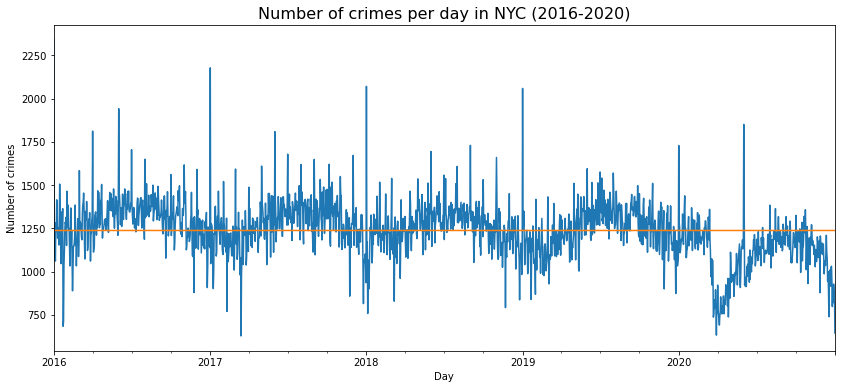

In [64]:
# Plotting the daily trend
fig = plt.figure(figsize=(14,6))
_ = ny_df.resample('D').size().plot()
_ = crimes_per_day['MEAN'].plot()
_ = plt.title('Number of crimes per day in NYC (2016-2020)', fontsize=16)
_ = plt.xlabel('Day')
_ = plt.ylabel('Number of crimes')

In [65]:
ny_df= ny_df.reset_index(drop=True)   # Reset time index back to normal index

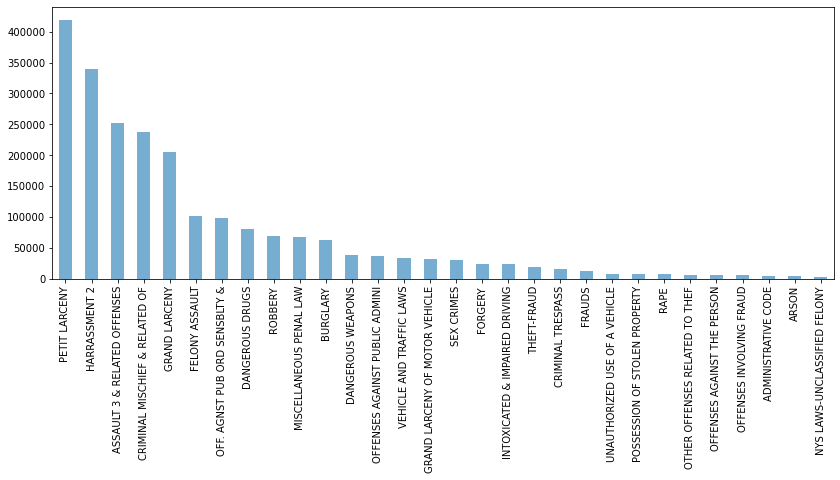

In [66]:
# Offense description
fig = plt.figure(figsize = (14,5))
_ = ny_df['ofns_desc'].value_counts()[:30].plot(kind='bar', alpha = 0.6)

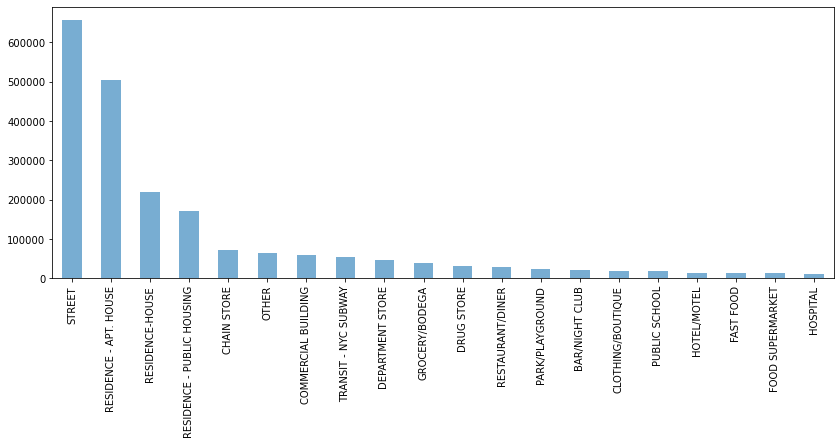

In [67]:
# prem_typ_desc
fig = plt.figure(figsize = (14,5))
_ = ny_df['prem_typ_desc'].value_counts()[:20].plot(kind='bar', alpha = 0.6)

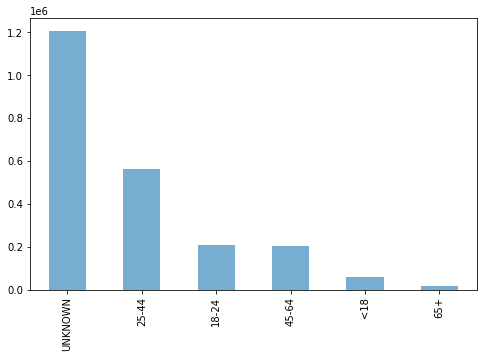

In [68]:
# susp_age_group
fig = plt.figure(figsize = (8,5))
_ = ny_df['susp_age_group'].value_counts().plot(kind='bar', alpha = 0.6)

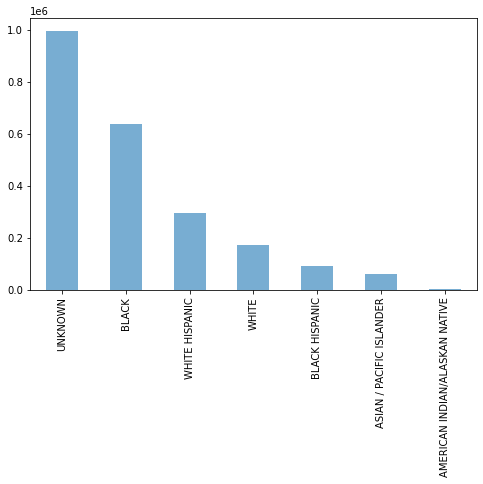

In [69]:
# susp_race
fig = plt.figure(figsize = (8,5))
_ = ny_df['susp_race'].value_counts().plot(kind='bar', alpha = 0.6)

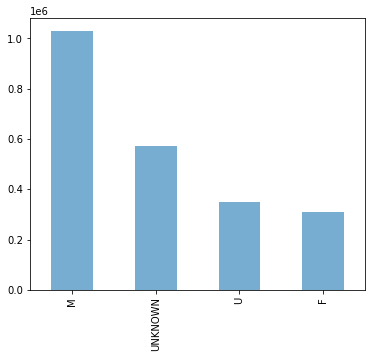

In [70]:
# susp_sex
fig = plt.figure(figsize = (6,5))
_ = ny_df['susp_sex'].value_counts().plot(kind='bar', alpha = 0.6)

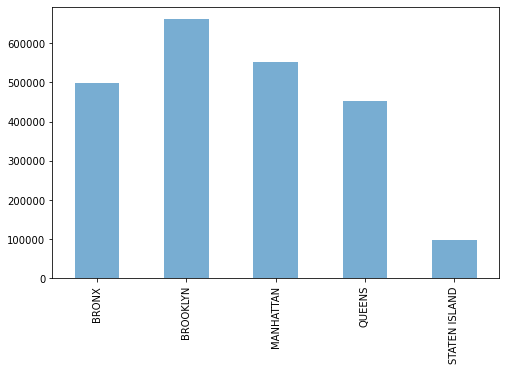

In [71]:
# boro_nm
fig = plt.figure(figsize = (8,5))
_ = ny_df['boro_nm'].value_counts().sort_index().plot(kind='bar', alpha = 0.6)

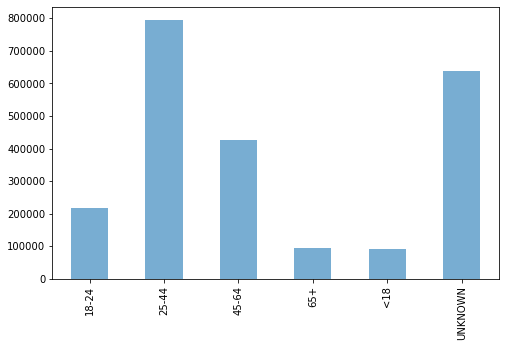

In [72]:
# vic_age_group
fig = plt.figure(figsize = (8,5))
_ = ny_df['vic_age_group'].value_counts().sort_index().plot(kind='bar', alpha = 0.6)

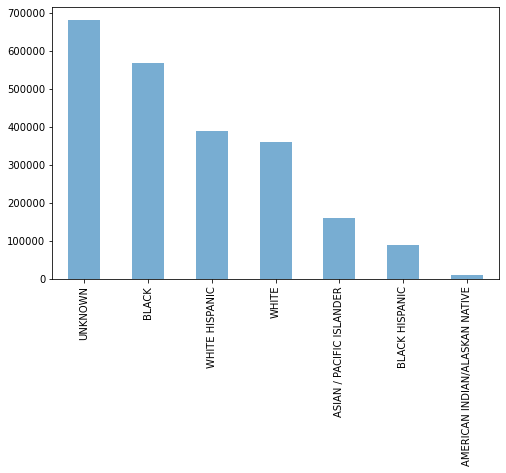

In [73]:
# vic_race
fig = plt.figure(figsize = (8,5))
_ = ny_df['vic_race'].value_counts().plot(kind='bar', alpha = 0.6)

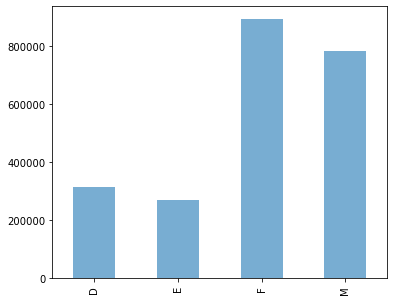

In [74]:
# vic_sex
fig = plt.figure(figsize = (6,5))
_ = ny_df['vic_sex'].value_counts().sort_index().plot(kind='bar', alpha = 0.6)

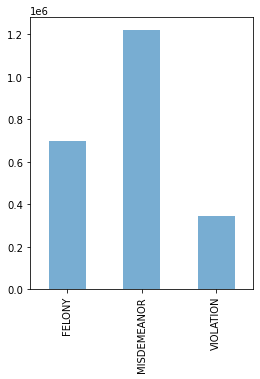

In [75]:
# law_cat_cd
fig = plt.figure(figsize = (4,5))
_ = ny_df['law_cat_cd'].value_counts().sort_index().plot(kind='bar', alpha = 0.6)

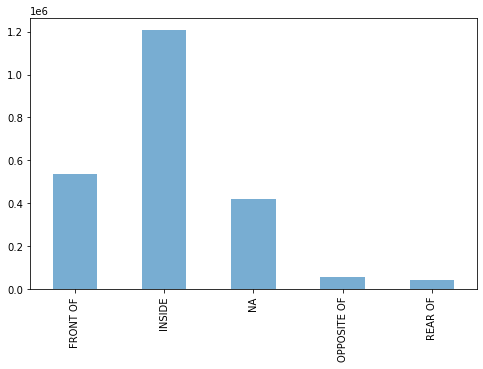

In [76]:
# loc_of_occur_desc
fig = plt.figure(figsize = (8,5))
_ = ny_df['loc_of_occur_desc'].value_counts().sort_index().plot(kind='bar', alpha = 0.6)

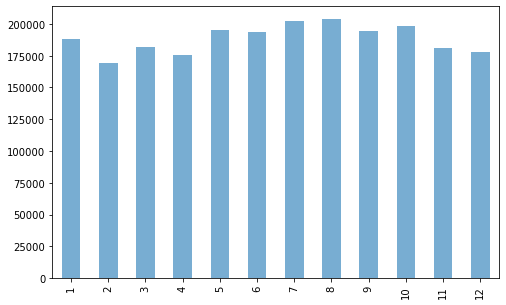

In [77]:
# Month
fig = plt.figure(figsize = (8,5))
_ = ny_df['MONTH'].value_counts().sort_index().plot(kind='bar', alpha = 0.6)

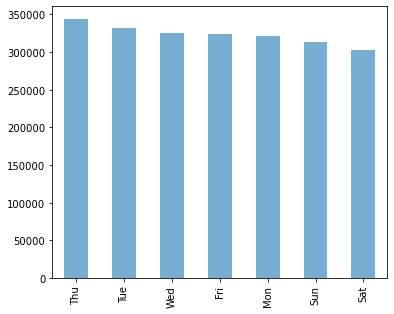

In [78]:
# DAY_OF_WEEK
fig = plt.figure(figsize = (6,5))
_ = ny_df['DAY_OF_WEEK'].value_counts().plot(kind='bar', alpha = 0.6)

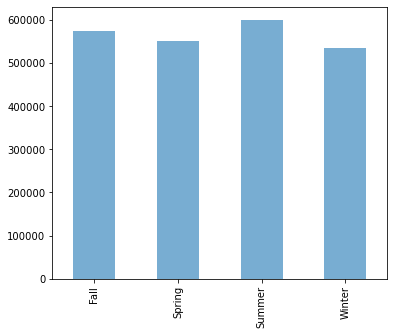

In [79]:
# Season
fig = plt.figure(figsize = (6,5))
_ = ny_df['Season'].value_counts().sort_index().plot(kind='bar', alpha = 0.6)